<a href="https://colab.research.google.com/github/TheophilusG/DataBootcamp/blob/main/Regression_Homework_NYU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### A Regression Model for Wages

This homework assignment works through creating a regression model to predict the wage of an individual given some basic demographic information.  The dataset is from the openml data repository and was culled from Census data -- see information [here](https://www.openml.org/search?type=data&sort=runs&id=534&status=active).  

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
survey = fetch_openml(data_id=534, as_frame=True)

In [3]:
df = survey.frame
df.head()

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,no,female,21,not_member,5.10,35,Hispanic,Other,Manufacturing,Married
1,9,no,female,42,not_member,4.95,57,White,Other,Manufacturing,Married
2,12,no,male,1,not_member,6.67,19,White,Other,Manufacturing,Unmarried
3,12,no,male,4,not_member,4.00,22,White,Other,Other,Unmarried
4,12,no,male,17,not_member,7.50,35,White,Other,Other,Married


**PROBLEM 1: Splitting the data.**

Use the `train_test_split` function to create a train and test dataset for all features and the target column `WAGE`.  Your test set should be comprised of 20% of the total data.

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
wages = df['WAGE']
X_train, X_test, y_train, y_test = train_test_split(df, wages, test_size=0.2, random_state=42)

**PROBLEM 2: Checking Assumptions**

One assumption of the Linear Regression model is that the target feature is roughly normally distributed.  Is this assumption met?  If yes move on, if no consider transforming the target using `np.log` and compare the distribution of the logarithm of wages.  If the logarithm is more "normal", use this as your target.

Text(0.5, 1.0, 'Distribution of Wages')

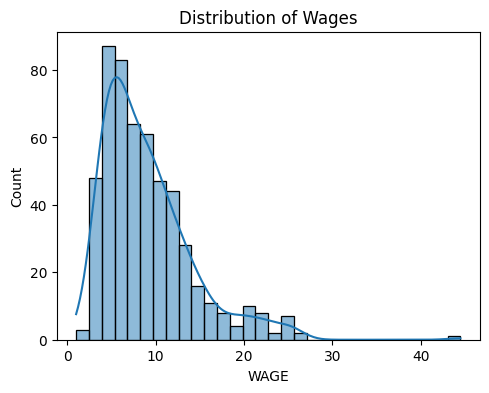

In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 4))
plt.subplot(121)
sns.histplot(wages, kde=True)
plt.title('Distribution of Wages')

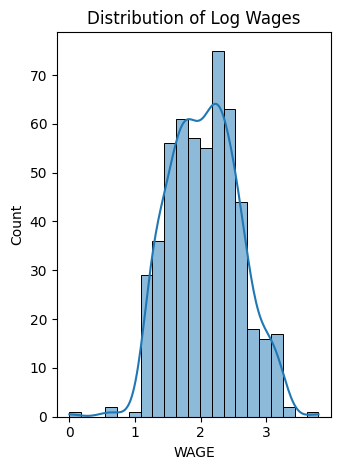

In [7]:
plt.subplot(122)
sns.histplot(np.log(wages), kde=True)
plt.title('Distribution of Log Wages')
plt.tight_layout()
plt.show()

In [8]:
# Log transform the target as it appears more normal
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

**PROBLEM 3: Preparing the Data**

For the categorical features, use the `OneHotEncoder` to encode the different categorical variables and eliminate any reduntant information using the `drop = 'if_binary'` argument.

In [9]:
df.head()

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,no,female,21,not_member,5.10,35,Hispanic,Other,Manufacturing,Married
1,9,no,female,42,not_member,4.95,57,White,Other,Manufacturing,Married
2,12,no,male,1,not_member,6.67,19,White,Other,Manufacturing,Unmarried
3,12,no,male,4,not_member,4.00,22,White,Other,Other,Unmarried
4,12,no,male,17,not_member,7.50,35,White,Other,Other,Married


In [10]:
numeric_features = ['EDUCATION','EXPERIENCE', 'AGE', 'WAGE']
categorical_features = ['RACE', 'OCCUPATION', 'SECTOR', 'MARR', 'UNION', 'SEX', 'SOUTH']

In [11]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
ct = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), categorical_features),
    remainder ='passthrough'
)

**PROBLEM 4: Using `make_column_transformer`**

Rather than taking just the categorical features, transforming these, and merging the dummied data with the other numeric features -- `make_column_transformer` will accomplish this for us.  Look over the user guide [here](https://scikit-learn.org/stable/modules/compose.html#make-column-transformer) and use this to transform the categorical features with `OneHotEncoder` and leave the remaining features as is.  Be sure to transform both your training and test datasets correctly and assign as `X_train_encoded` and `X_test_encoded` below.

In [12]:
X_train_encoded = ct.fit_transform(X_train)
X_test_encoded = ct.fit_transform(X_test)

In [13]:
cat_feature_names=[]

In [14]:
# Create column transformer
ct = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), categorical_features),
    remainder='passthrough'
)

# Fit the column transformer on the training data
ct.fit(X_train)

# Get the feature names
cat_feature_names = ct.named_transformers_['onehotencoder'].get_feature_names_out(categorical_features)
feature_names = np.array(list(cat_feature_names) + numeric_features)

In [15]:
feature_names

array(['RACE_Hispanic', 'RACE_Other', 'RACE_White', 'OCCUPATION_Clerical',
       'OCCUPATION_Management', 'OCCUPATION_Other',
       'OCCUPATION_Professional', 'OCCUPATION_Sales',
       'OCCUPATION_Service', 'SECTOR_Construction',
       'SECTOR_Manufacturing', 'SECTOR_Other', 'MARR_Unmarried',
       'UNION_not_member', 'SEX_male', 'SOUTH_yes', 'EDUCATION',
       'EXPERIENCE', 'AGE', 'WAGE'], dtype='<U23')

**PROBLEM 5: Building the model**

Now that your data is prepared, build a regression model with the appropriate input and target values.  

In [16]:
model = LinearRegression()

In [17]:
model.fit(X_train_encoded, y_train_log)

LinearRegression()

**PROBLEM 6: Scoring the Model**

Now, evaluate the **Mean Squared Error** of your model on both the train and test data.  Compare this with a baseline prediction **Mean Squared Error**.  Did you model perform better than the baseline?

In [18]:
baseline_pred = np.full_like(y_train_log, y_train_log.mean())

In [19]:
from sklearn.metrics import mean_squared_error
baseline_mse = mean_squared_error(y_train_log , baseline_pred)
baseline_mse

0.26577641363057425

In [20]:
train_pred = model.predict(X_train_encoded)
test_pred = model.predict(X_test_encoded)
train_mse = mean_squared_error(y_train_log, train_pred)
test_mse = mean_squared_error(y_test_log, test_pred)

In [21]:
print("Model Performance:")
print(f"Baseline MSE: {baseline_mse:.2f}")
print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Model Performance:
Baseline MSE: 0.27
Train MSE: 0.03
Test MSE: 0.03


**PROBLEM 7: Interpreting Coefficients**

Examine your coefficients for the model.  Using complete sentences explain which of the features seem to lead to increases in wages, and which seem to lead to a decrease in wage.

In [22]:
import pandas as pd
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': model.coef_})

In [23]:
coef_df.sort_values(by='Coefficient', ascending=True)

,Feature,Coefficient
8,OCCUPATION_Service,-0.067261
13,UNION_not_member,-0.065131
19,WAGE,-0.044291
12,MARR_Unmarried,-0.043385
15,SOUTH_yes,-0.034248
11,SECTOR_Other,-0.024938
4,OCCUPATION_Management,-0.021639
7,OCCUPATION_Sales,-0.016670
0,RACE_Hispanic,-0.011359
5,OCCUPATION_Other,-0.001596


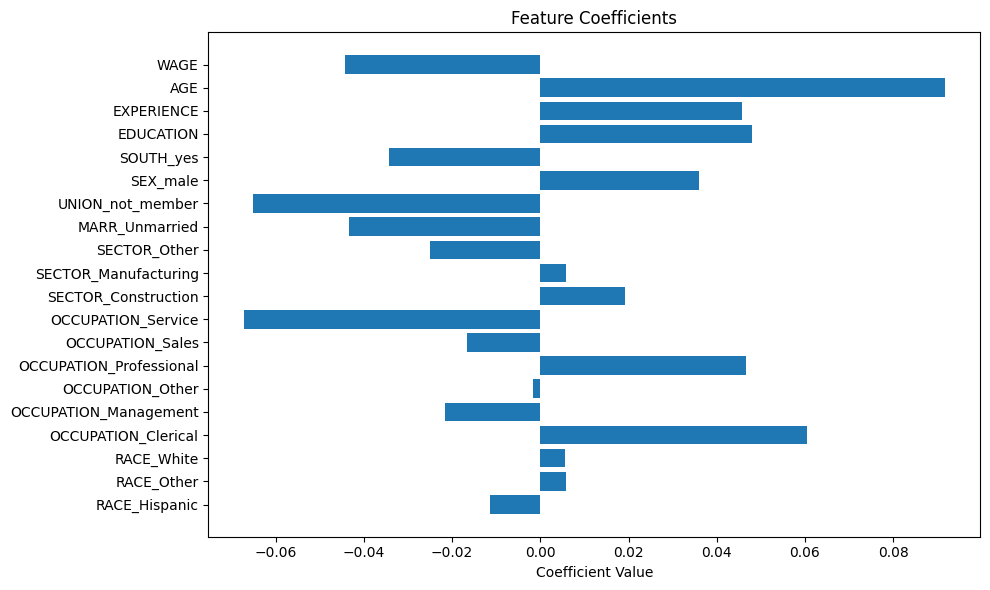

In [24]:
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.title('Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()

Ocupation Service, Uninon non memebrs are some of the features seems to lead increase in wages while age, clerical occupations and educations features seems to lead in decreasing wages.

**PROBLEM 8: Polynomial Features**

After building a basic model using all the features, compare this to a model using a quadratic polynomial.  Use `PolynomialFeatures` to create the features and score the train and test data as before.  Did this model perform better than the baseline or linear model?

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_encoded)
X_test_poly = poly.transform(X_test_encoded)

In [28]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_log)

LinearRegression()

In [29]:
train_pred_poly = poly_model.predict(X_train_poly)
test_pred_poly = poly_model.predict(X_test_poly)
train_mse_poly = mean_squared_error(y_train_log, train_pred_poly)
test_mse_poly = mean_squared_error(y_test_log, test_pred_poly)

In [61]:
print("\nPolynomial Model Performance:")
print(f"Train MSE: {train_mse_poly:.4f}")
print(f"Test MSE: {test_mse_poly:.4f}")


Polynomial Model Performance:
Train MSE: 0.0041
Test MSE: 0.0069


**PROBLEM 9: Feature Selection**

One of the downsides to the polynomial features is how many new features are introduced into the model.  To limit this, you can use *Feature Selection* once the polynomial terms have been generated.  Explore the `feature_selection` module [here](https://scikit-learn.org/stable/modules/feature_selection.html) and use a feature selector to limit the polynomial features to the 15 "most important" features.  Which of the features were selected?

In [31]:
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(score_func=f_regression, k=15)
selector.fit(X_train_poly, y_train_log)
X_test_selected = selector.transform(X_test_poly)

In [32]:
poly_feature_names = poly.get_feature_names_out(feature_names)
selected_features = poly_feature_names[selector.get_support()]

print("\nSelected Features:")
for feature in selected_features:
    print(feature)


Selected Features:
EDUCATION
AGE
RACE_White AGE
OCCUPATION_Management AGE
OCCUPATION_Professional AGE
OCCUPATION_Service UNION_not_member
SECTOR_Other AGE
UNION_not_member AGE
SEX_male AGE
EDUCATION^2
EDUCATION AGE
EDUCATION WAGE
EXPERIENCE AGE
AGE^2
AGE WAGE


**PROBLEM 10: Interpreting Coefficients**

Build a simple regression model and encode all the categorical features.  Fit the model on the training data. Draw a horizontal bar plot of the coefficients, and interpret the feature importance based on these coefficients.

In [43]:
model = LinearRegression()
model.fit(X_train_encoded, y_train_log)

LinearRegression()

In [44]:
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': model.coef_})

In [45]:
coef_df.sort_values(by='Coefficient', ascending=True)

,Feature,Coefficient
8,OCCUPATION_Service,-0.067261
13,UNION_not_member,-0.065131
19,WAGE,-0.044291
12,MARR_Unmarried,-0.043385
15,SOUTH_yes,-0.034248
11,SECTOR_Other,-0.024938
4,OCCUPATION_Management,-0.021639
7,OCCUPATION_Sales,-0.016670
0,RACE_Hispanic,-0.011359
5,OCCUPATION_Other,-0.001596


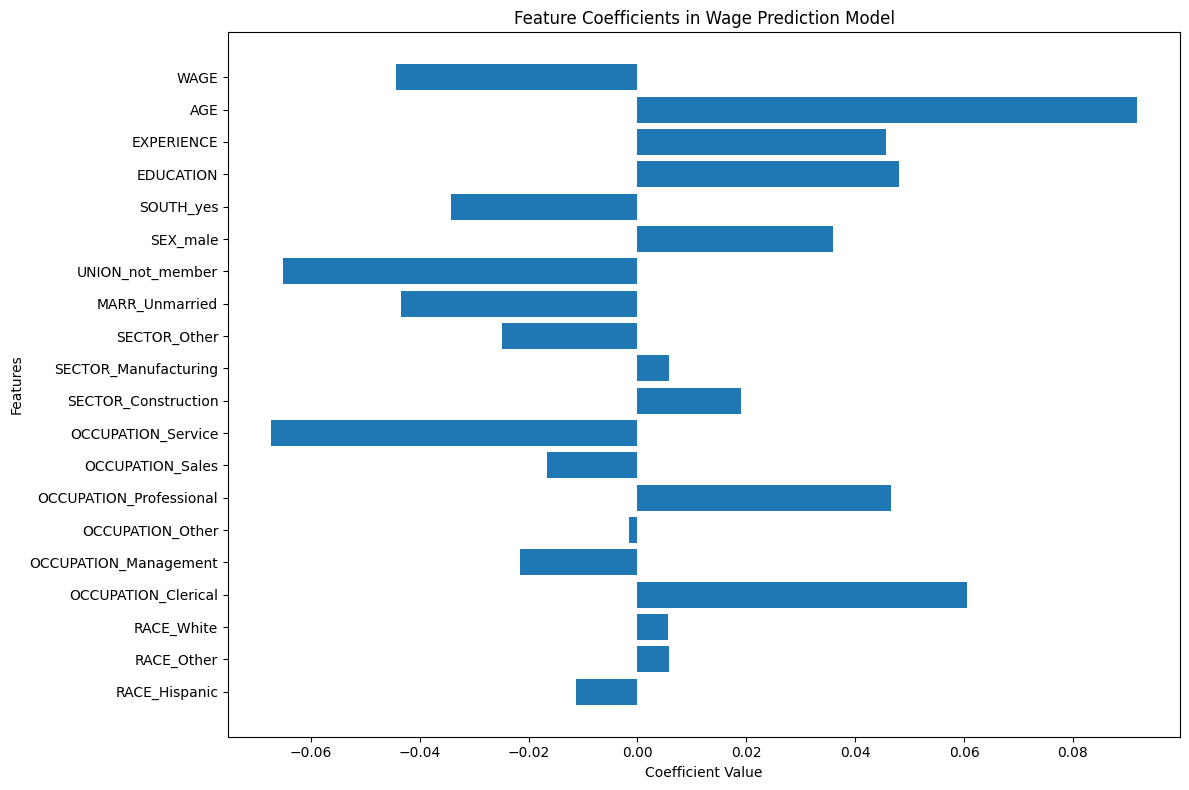

In [46]:
plt.figure(figsize=(12, 8))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.title('Feature Coefficients in Wage Prediction Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [47]:
print("\nFeature Coefficients:")
for feature, coef in zip(coef_df['Feature'], coef_df['Coefficient']):
    print(f"{feature}: {coef:.4f}")


Feature Coefficients:
RACE_Hispanic: -0.0114
RACE_Other: 0.0058
RACE_White: 0.0056
OCCUPATION_Clerical: 0.0605
OCCUPATION_Management: -0.0216
OCCUPATION_Other: -0.0016
OCCUPATION_Professional: 0.0467
OCCUPATION_Sales: -0.0167
OCCUPATION_Service: -0.0673
SECTOR_Construction: 0.0191
SECTOR_Manufacturing: 0.0058
SECTOR_Other: -0.0249
MARR_Unmarried: -0.0434
UNION_not_member: -0.0651
SEX_male: 0.0359
SOUTH_yes: -0.0342
EDUCATION: 0.0480
EXPERIENCE: 0.0457
AGE: 0.0917
WAGE: -0.0443


**PROBLEM 11: Revisiting Interpretation**

Read through the article on [**Common Pitfalls in the interpretation of coefficients of linear models**](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html).  What does the author suggest is a better way of using the coefficients of a linear model to determine the "importance" of a feature?  Draw a horizontal barplot of the updated coefficients and interpret the results.

According to the author, a better way to determine the "importance" of a feature in a linear model is to scale the coefficients by the standard deviation of the corresponding feature. This is because the features have different natural scales and value ranges, so the raw coefficient values cannot be directly compared.

Multiplying the coefficients by the standard deviation of the related feature would reduce all the coefficients to the same unit of measure. As we will see after this is equivalent to normalize numerical variables to their standard deviation, as y = ∑ c o e f i × X i = ∑ ( c o e f i × s t d i ) × ( X i / s t d i ) .
In that way, we emphasize that the greater the variance of a feature, the larger the weight of the corresponding coefficient on the output, all else being equal.

The updated coefficients, scaled by the standard deviation of each feature, are shown in the following horizontal barplot:

python coefs = pd.DataFrame(     model[-1].regressor_.coef_ * X_train_preprocessed.std(axis=0),     columns=["Coefficient importance"],     index=feature_names, ) coefs.plot(kind="barh", figsize=(9, 7)) plt.xlabel("Coefficient values corrected by the feature's std. dev.") plt.title("Ridge model, small regularization") plt.axvline(x=0, color=".5") plt.subplots_adjust(left=0.3)

![Ridge model, small regularization]

This plot shows that the three most important features are EDUCATION, EXPERIENCE, and AGE, as they have the largest coefficient values after scaling by the standard deviation. The categorical features like UNION and SEX also have significant importance, but to a lesser degree than the numerical features.

The key takeaway is that scaling the coefficients by the standard deviation of the features provides a more meaningful way to assess their relative importance, as it accounts for the different scales of the original variables.

In [48]:
X_scaled = X_train_encoded.copy()
for i in range(X_scaled.shape[1]):
    X_scaled[:, i] = X_scaled[:, i] * np.std(X_train_encoded[:, i])

In [49]:
model_scaled = LinearRegression()
model_scaled.fit(X_scaled, y_train_log)

LinearRegression()

In [53]:
coef_df_scaled = pd.DataFrame({
    'Feature': feature_names,
    'Scaled_Coefficient': model_scaled.coef_
})

In [54]:
coef_df_scaled = coef_df_scaled.sort_values('Scaled_Coefficient', ascending= True)

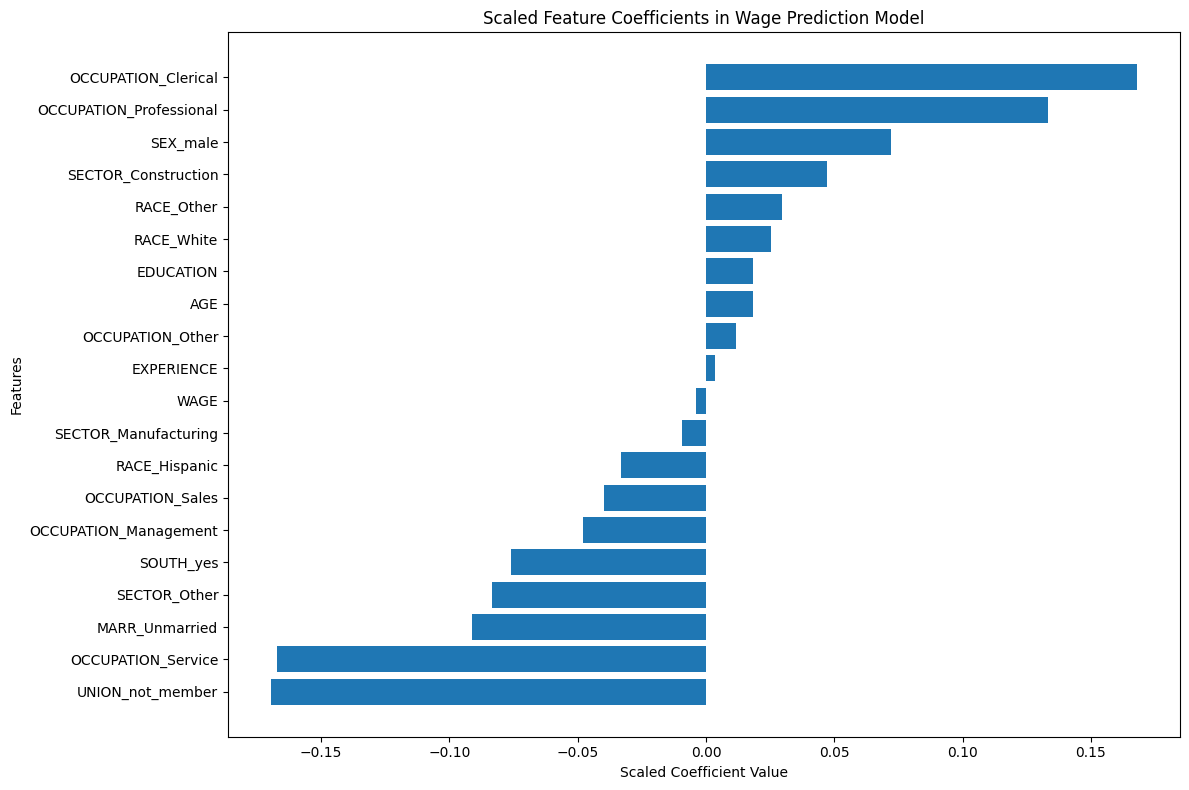

In [55]:
plt.figure(figsize=(12, 8))
plt.barh(coef_df_scaled['Feature'], coef_df_scaled['Scaled_Coefficient'])
plt.title('Scaled Feature Coefficients in Wage Prediction Model')
plt.xlabel('Scaled Coefficient Value')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [56]:
print("\nScaled Feature Coefficients:")
for feature, coef in zip(coef_df_scaled['Feature'], coef_df_scaled['Scaled_Coefficient']):
    print(f"{feature}: {coef:.4f}")


Scaled Feature Coefficients:
UNION_not_member: -0.1694
OCCUPATION_Service: -0.1672
MARR_Unmarried: -0.0910
SECTOR_Other: -0.0835
SOUTH_yes: -0.0760
OCCUPATION_Management: -0.0478
OCCUPATION_Sales: -0.0398
RACE_Hispanic: -0.0332
SECTOR_Manufacturing: -0.0095
WAGE: -0.0038
EXPERIENCE: 0.0037
OCCUPATION_Other: 0.0118
AGE: 0.0184
EDUCATION: 0.0185
RACE_White: 0.0254
RACE_Other: 0.0295
SECTOR_Construction: 0.0471
SEX_male: 0.0720
OCCUPATION_Professional: 0.1333
OCCUPATION_Clerical: 0.1679
